# Kinematics Analysis

In [1]:
from cyto.postprocessing.graph import *
from cyto.utils.label_to_table import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import dask.dataframe as dd
from cyto.utils.kinematics import *
from dask.distributed import Client
from matplotlib.collections import LineCollection
from matplotlib.colors import Normalize, LogNorm

## Dask Client

In [2]:
client=Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 16,Total memory: 125.49 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44779,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 125.49 GiB
Comm: tcp://127.0.0.1:42897,Total threads: 4
Dashboard: http://127.0.0.1:33199/status,Memory: 31.37 GiB
Nanny: tcp://127.0.0.1:40849,


## Load Data
Use the ultrack mapped, area-sized filtered and track_length pre-filtered tracks or signal mapped dataframes from example 5 

In [3]:
tracks_df_filtered_tcell = dd.read_csv("/mnt/KIRPC602/DATA/UTSE/2023_11_24_1G4PrimCD8_Nyeso1_HCT116_CTFR_100nM_ICAM5ug_framerate10sec_flow_0p1mlperh_analysis/tracking/5x/TCell_TCell/patch_04/track/00/tracks_remap.csv")
tracks_df_filtered_cancer = dd.read_csv("/mnt/KIRPC602/DATA/UTSE/2023_11_24_1G4PrimCD8_Nyeso1_HCT116_CTFR_100nM_ICAM5ug_framerate10sec_flow_0p1mlperh_analysis/tracking/5x/CancerCell_CancerCell/patch_04/track/00/tracks_remap.csv")
# tracks_df_filtered_tcell.drop("Unnamed: 0", axis=1, inplace=True)
# tracks_df_filtered_cancer.drop("Unnamed: 0", axis=1, inplace=True)
tracks_df_filtered_cancer

,label,y,x,bbox_xstart,bbox_ystart,bbox_xsize,bbox_ysize,i,j,bbox_istart,bbox_jstart,bbox_isize,bbox_jsize,size,elongation,flatness,roundness,feret_diameter,feret_radius,perimeter,mass,mean,median,sd,frame,channel,alive,track_id,id,dist_from_ultrack,tracked frames,tracked length,mean tracked cell size
npartitions=15,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,object,float64,int64,int64,float64,int64,int64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## Perform Kinematics Calculations

### T Cells

In [4]:
tracks_df_filtered_tcell = cal_kinematics(tracks_df_filtered_tcell.partitions[:])
tracks_df_filtered_tcell.head()

/home/jackyko/Projects/Cytotoxicity-Pipeline/cyto/utils/kinematics.py:15: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .shift(1)
  After:  .shift(1, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .shift(1, meta=('x', 'f8'))            for series result
  dx_from_previous_point=sorted_grouped.groupby(track_id_col)[x_col].shift(-1)-sorted_grouped[x_col],
/home/jackyko/Projects/Cytotoxicity-Pipeline/cyto/utils/kinematics.py:16: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .shift(1)
  After:  .shift(1, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .shift(1, meta=('x', 'f8'))            for series result
  dy_from_previous_point=sorted_grouped.groupby(track_id_col)[y_col].shift(-1)-sorted_grouped[y_col],
/home/jackyko/Projects/Cytotoxicity-Pipeline/cyto/utils/kinematics.py:17: UserWarning: `meta` is not

,label,y,x,bbox_xstart,bbox_ystart,bbox_xsize,bbox_ysize,i,j,bbox_istart,...,dy from origin,displacement from origin,dx acc,dy acc,distance traveled,path efficiency,vel_x,vel_y,speed,average speed
0,164748,44.148148,476.851852,474,39,6,12,476.851852,44.148148,474.0,...,0.021663,0.094073,0.091544,0.021663,0.094073,1.000000,0.091544,0.021663,0.094073,0.000000
1,165067,44.169811,476.943396,474,39,6,11,476.943396,44.169811,474.0,...,-0.148148,0.366889,0.335648,0.191474,0.391432,1.066895,0.244104,-0.169811,0.297359,0.391432
2,165408,44.000000,477.187500,474,39,6,11,477.187500,44.000000,474.0,...,-0.495974,0.642873,0.409018,0.539301,0.746912,1.161834,0.073370,-0.347826,0.355480,0.373456
3,165738,43.652174,477.260870,474,39,6,11,477.260870,43.652174,474.0,...,-0.834423,0.918308,0.434593,0.877749,1.086325,1.182964,-0.025575,-0.338448,0.339413,0.362108
4,166021,43.313725,477.235294,474,37,6,13,477.235294,43.313725,474.0,...,-0.393046,0.402543,0.731112,1.319126,1.618055,4.019582,-0.296519,0.441377,0.531730,0.404514


### Cancer Cells

In [5]:
tracks_df_filtered_cancer = cal_kinematics(tracks_df_filtered_cancer.partitions[:])
tracks_df_filtered_cancer.head()

/home/jackyko/Projects/Cytotoxicity-Pipeline/cyto/utils/kinematics.py:15: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .shift(1)
  After:  .shift(1, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .shift(1, meta=('x', 'f8'))            for series result
  dx_from_previous_point=sorted_grouped.groupby(track_id_col)[x_col].shift(-1)-sorted_grouped[x_col],
/home/jackyko/Projects/Cytotoxicity-Pipeline/cyto/utils/kinematics.py:16: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .shift(1)
  After:  .shift(1, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .shift(1, meta=('x', 'f8'))            for series result
  dy_from_previous_point=sorted_grouped.groupby(track_id_col)[y_col].shift(-1)-sorted_grouped[y_col],
/home/jackyko/Projects/Cytotoxicity-Pipeline/cyto/utils/kinematics.py:17: UserWarning: `meta` is not

,label,y,x,bbox_xstart,bbox_ystart,bbox_xsize,bbox_ysize,i,j,bbox_istart,...,dy from origin,displacement from origin,dx acc,dy acc,distance traveled,path efficiency,vel_x,vel_y,speed,average speed
0,180487,1.484848,27.878788,24,0,9,5,27.878788,1.484848,24.0,...,0.001638,0.473385,0.473382,0.001638,0.473385,1.000000,-0.473382,0.001638,0.473385,0.000000
1,181097,1.486486,27.405405,23,0,10,5,27.405405,1.486486,23.0,...,0.119803,1.048446,1.041579,0.119803,1.053738,1.005048,-0.568196,0.118165,0.580353,1.053738
2,181710,1.604651,26.837209,22,0,11,5,26.837209,1.604651,22.0,...,0.259832,1.392604,1.368150,0.259832,1.409065,1.011820,-0.326571,0.140030,0.355327,0.704532
3,182326,1.744681,26.510638,22,0,11,5,26.510638,1.744681,22.0,...,0.076127,0.857782,1.881902,0.443538,1.954673,2.278752,0.513752,-0.183705,0.545609,0.651558
4,182959,1.560976,27.024390,22,0,11,5,27.024390,1.560976,22.0,...,0.079254,0.627403,2.113922,0.446665,2.186715,3.485340,0.232020,0.003127,0.232041,0.546679


## MSD Plots

### Basic Definitions

The MSD at time $t$ is defined as an ensemble average:

$$\displaystyle {\text{MSD}}\equiv \left\langle \left|\mathbf {x} (t)-\mathbf {x_{0}} \right|^{2}\right\rangle ={\frac {1}{N}}\sum _{i=1}^{N}\left|\mathbf {x^{(i)}} (t)-\mathbf {x^{(i)}} (0)\right|^{2}$$

where $N$ is the number of particles to be averaged, vector $\displaystyle \mathbf {x^{(i)}} (0)=\mathbf {x_{0}^{(i)}} $ is the reference position of the  $i$-th particle, and vector $\displaystyle \mathbf {x^{(i)}} (t)$ is the position of the $i$-th particle at time t.

In [6]:
msd_tcell = cal_msd(tracks_df_filtered_tcell)
msd_tcell.head()

/home/jackyko/mambaforge/envs/cyto/lib/python3.10/site-packages/dask/dataframe/multi.py:1291: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
/home/jackyko/mambaforge/envs/cyto/lib/python3.10/site-packages/distributed/client.py:3109: UserWarning: Sending large graph of size 702.22 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


,frame,msd,sd
8609,0,0.345507,0.755104
8610,1,1.262600,5.610674
8611,2,1.615450,5.406503
8612,3,2.080669,6.057334
8613,4,3.138567,7.594032


In [7]:
msd_cancer = cal_msd(tracks_df_filtered_cancer)
msd_cancer.head()

/home/jackyko/mambaforge/envs/cyto/lib/python3.10/site-packages/dask/dataframe/multi.py:1291: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
/home/jackyko/mambaforge/envs/cyto/lib/python3.10/site-packages/distributed/client.py:3109: UserWarning: Sending large graph of size 643.77 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


,frame,msd,sd
4280,0,2.429525,17.470171
4281,1,4.464178,27.174438
4282,2,3.321349,21.796208
4283,3,3.164501,16.400020
4284,4,3.056625,15.961283


Text(0.5, 1.0, 'MSD Plot')

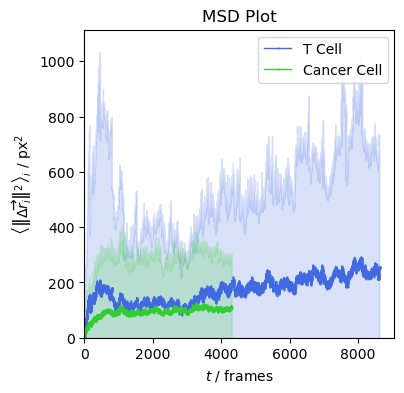

In [8]:
fig, axs = plt.subplots(1,1,figsize=(4,4))
axs.plot(msd_tcell.frame,msd_tcell.msd, marker='.', linestyle='-', color='royalblue', linewidth=1, markersize=1 , label="T Cell")
axs.fill_between(msd_tcell.frame, msd_tcell.msd - msd_tcell.sd, msd_tcell.msd + msd_tcell.sd, color='royalblue', alpha=0.2)
axs.plot(msd_cancer.frame,msd_cancer.msd, marker='.', linestyle='-', color='limegreen', linewidth=1, markersize=1 , label="Cancer Cell")
axs.fill_between(msd_cancer.frame, msd_cancer.msd - msd_cancer.sd, msd_cancer.msd + msd_cancer.sd, color='limegreen', alpha=0.2)
axs.legend()
axs.set_xlim(xmin=0)
axs.set_ylim(ymin=0)
axs.set_xlabel(r'$t$ / frames')
axs.set_ylabel(r'$\left\langle\left\| \Delta \overrightarrow{r}_i \right\|^2 \right\rangle_i $ / px$^2$')
axs.set_title("MSD Plot")
# axs.grid(True)

### Calculate Time Lags MSD for Single Particle Tracking (SPT)

In the measurements of single particle/cell tracking (SPT), displacements can be defined for different time intervals between positions (also called time lags or lag times). SPT yields the trajectory $\vec{r}(t)=[x(t),y(t)]$, representing a particle undergoing two-dimensional motion.

Assuming that the trajectory of a single particle measured at time points $1\Delta t, 2\Delta t, ..., N\Delta t$ where $\Delta t$ is any fixed observe time interval, then there are $N(N-1)/2$ non-trivial forward displacements $\displaystyle {\vec {d}}_{ij}={\vec {r}}_{j}-{\vec {r}}_{i}$ which correspond to time intervals (or time lags) $\displaystyle \,\Delta t_{ij}=(j-i)\,\Delta t$

Hence, there are many distinct displacements for small time lags, and very few for large time lags, MSD can be defined as an average quantity over time lags:

$$\displaystyle {\overline {\delta ^{2}(n)}}={\frac {1}{N-n}}\sum _{i=1}^{N-n}{({\vec {r}}_{i+n}-{\vec {r}}_{i}})^{2}\qquad n=1,\ldots ,N-1.$$

### Plot Time Lags MSD for SPT

In [9]:
#sanity check for a particular track_id
track_check = 80
single_track = tracks_df_filtered_tcell[tracks_df_filtered_tcell["track_id"]==track_check][["track_id","frame","displacement from origin","dt acc"]]
single_track['displacement squared'] = single_track['displacement from origin'] ** 2
print(single_track)

     track_id  frame  displacement from origin  dt acc  displacement squared
40         80    260                  4.383102       0             19.211586
41         80    262                 20.050512       2            402.023027
42         80    265                 21.143588       5            447.051322
43         80    266                 21.151129       6            447.370261
44         80    267                 21.422866       7            458.939185
..        ...    ...                       ...     ...                   ...
118        80    343                 18.125647      83            328.539069
119        80    344                 18.313706      84            335.391844
120        80    345                 17.877630      85            319.609669
121        80    346                 10.744337      86            115.440780
122        80    359                 10.744337      99            115.440780

[83 rows x 5 columns]


100%|██████████| 99/99 [00:01<00:00, 52.00it/s] 


Text(0.5, 1.0, 'Time Lagged MSD Plot: Cell 80')

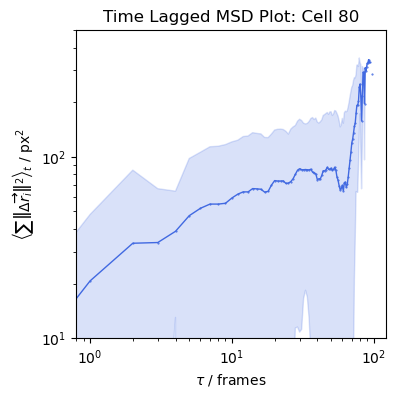

In [10]:
msd_lagged = []
msd_lagged_sd = []

time_lags = np.arange(0,single_track['frame'].max()-single_track['frame'].min(),1)

for lag in tqdm(time_lags):
    msd_value, msd_sd = compute_msd_time_lag(lag, single_track)
    msd_lagged.append(msd_value)
    msd_lagged_sd.append(msd_sd)

msd_lagged = np.asarray(msd_lagged)
msd_lagged_sd = np.asarray(msd_lagged_sd)

fig, axs = plt.subplots(1,1,figsize=(4,4))
axs.plot(time_lags,msd_lagged, marker='.', linestyle='-', color='royalblue', linewidth=1, markersize=1)
axs.fill_between(time_lags, msd_lagged - msd_lagged_sd, msd_lagged + msd_lagged_sd, color='royalblue', alpha=0.2)
axs.set_ylim(1e1,5e2)
axs.set_xscale("log")
axs.set_yscale("log")
axs.set_xlabel(r'$\tau$ / frames')
axs.set_ylabel(r'$\left\langle \sum\left\| \Delta \overrightarrow{r}_i \right\|^2 \right\rangle_t $ / px$^2$')
axs.set_title("Time Lagged MSD Plot: Cell {}".format(track_check))

### Plot More Track MSDs

In [11]:
msd_lagged = []
time_lags = []
tracks_to_plot = 100

for track_id, track_data in tracks_df_filtered_tcell.groupby('track_id'):
    if len(track_data) > 200: #for quick debug only run on short tracks
        continue

    track_data = track_data[["track_id","frame","displacement from origin","dt acc"]]
    track_data['displacement squared'] = track_data['displacement from origin'] ** 2

    msd_lagged_ = []

    time_lags_ = np.arange(0,track_data['frame'].max()-track_data['frame'].min(),1)

    for lag in tqdm(time_lags_, desc="track {}".format(track_id)):
        msd_value, _ = compute_msd_time_lag(lag, track_data)
        msd_lagged_.append(msd_value)

    time_lags.append(time_lags_)
    msd_lagged.append(msd_lagged_)

    if track_id > tracks_to_plot-1:
        break

/tmp/ipykernel_79020/70103507.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_data['displacement squared'] = track_data['displacement from origin'] ** 2
track 1: 100%|██████████| 126/126 [00:04<00:00, 29.12it/s]
/tmp/ipykernel_79020/70103507.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_data['displacement squared'] = track_data['displacement from origin'] ** 2
track 2: 100%|██████████| 39/39 [00:00<00:00, 79.22it/s]
/tmp/ipykernel_79020/70103507.py:10: SettingWithCopyWarning: 
A valu

Text(0.5, 0, 'fraction')

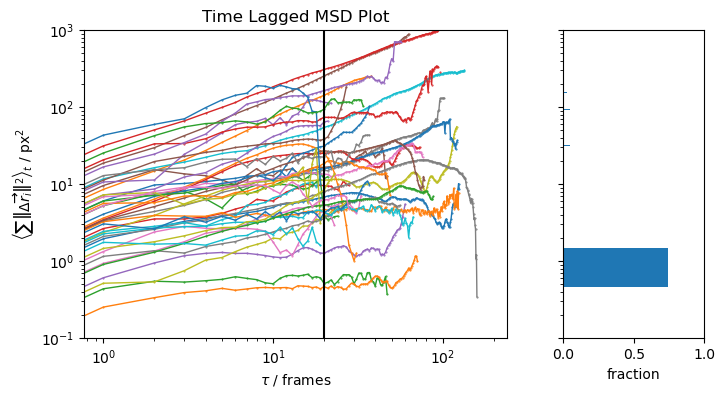

In [12]:
fig, axs = plt.subplots(1,2,figsize=(8,4),sharey=True, gridspec_kw={'width_ratios': [3, 1]})
msd_hist_values=[]
threshold=20

# axs.plot(time_lags,msd_lagged, marker='.', linestyle='-', linewidth=1, markersize=1)
axs[0].set_ylim(1e-1,1e3)
axs[0].set_xscale("log")
axs[0].set_yscale("log")
axs[0].set_xlabel(r'$\tau$ / frames')
axs[0].set_ylabel(r'$\left\langle \sum\left\| \Delta \overrightarrow{r}_i \right\|^2 \right\rangle_t $ / px$^2$')
axs[0].set_title("Time Lagged MSD Plot")

for time_lags_,msd_lagged_ in zip(time_lags,msd_lagged):
    val = pd.DataFrame({"time_lags":time_lags_, "msd_lagged": msd_lagged_})

    axs[0].plot(time_lags_,msd_lagged_, marker='.', linestyle='-', linewidth=1, markersize=1)

    if len(val)>threshold:
        i=val.loc[val["time_lags"]==threshold,"msd_lagged"].values[0]
        msd_hist_values.append(i)
axs[0].axvline(threshold,color='k')

msd_hist_values=[i for i in msd_hist_values if str(i) != 'nan']

H,B=np.histogram(msd_hist_values)
H_norm=H/len(msd_hist_values)
axs[1].barh(B[:-1],H_norm,height=1,align='edge')
axs[1].set_xlim(0,1)
axs[1].set_xlabel(r'fraction')

## Displacement and Traveled Distances Analysis

### Displacement Plot from Initial Position

Index(['label', 'y', 'x', 'bbox_xstart', 'bbox_ystart', 'bbox_xsize',
       'bbox_ysize', 'i', 'j', 'bbox_istart', 'bbox_jstart', 'bbox_isize',
       'bbox_jsize', 'size', 'elongation', 'flatness', 'roundness',
       'feret_diameter', 'feret_radius', 'perimeter', 'mass', 'mean', 'median',
       'sd', 'frame', 'channel', 'alive', 'track_id', 'id',
       'dist_from_ultrack', 'tracked frames', 'tracked length',
       'mean tracked cell size', 'dx from previous point',
       'dy from previous point', 'dt', 'dt acc',
       'displacement from previous point', 'dx from origin', 'dy from origin',
       'displacement from origin', 'dx acc', 'dy acc', 'distance traveled',
       'path efficiency', 'vel_x', 'vel_y', 'speed', 'average speed'],
      dtype='object')
Series([], Name: frame, dtype: int64)
0       19
1       20
2       21
3       22
4       23
      ... 
122    141
123    142
124    143
125    144
126    145
Name: frame, Length: 127, dtype: int64
0     22
1     23
2     24
3 

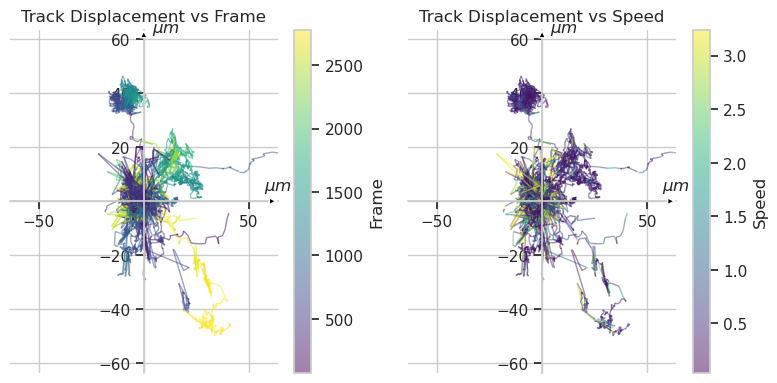

In [39]:
fig, axs = plt.subplots(1,2,figsize=(8,4))

print(tracks_df_filtered_tcell.columns)

col_to_plot = ["frame", "speed"]
track_range = range(0,100)

tracks_df_tcell_selected = tracks_df_filtered_tcell[(tracks_df_filtered_tcell['track_id'] >= track_range[0]) & (tracks_df_filtered_tcell['track_id'] <= track_range[-1])]

axs_range = max(np.abs(tracks_df_tcell_selected['dx from origin']).max()*1.1*1.6, np.abs(tracks_df_tcell_selected['dy from origin']).max()*1.1*1.6)

for i, (col, ax) in enumerate(zip(col_to_plot, axs.ravel())):
    # Move left y-axis and bottom x-axis to the center
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')

    # Eliminate the top and right spines
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Set ticks position
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    ax.set_xlim((-1*axs_range,axs_range))
    ax.set_ylim((-1*axs_range,axs_range))

    ax.annotate('', xy=(axs_range, 0), xytext=(axs_range-2, 0),
            arrowprops=dict(facecolor='black', arrowstyle='-|>',lw=1))
    ax.annotate('', xy=(0, axs_range), xytext=(0, axs_range-2),
                arrowprops=dict(facecolor='black', arrowstyle='-|>',lw=1))
    ax.annotate(r'$\mu m$', xy=((axs_range, 4)),horizontalalignment="center",)
    ax.annotate(r'$\mu m$', xy=((4, axs_range)),verticalalignment="center",)

    ax.set_title("Track Displacement vs {}".format(col.capitalize()))

    # Normalize the scalar values for colormap
    colors_range = [0,0]
    vals = []
    for t_id in track_range:
        single_tcell_df = tracks_df_tcell_selected.loc[tracks_df_tcell_selected["track_id"]==t_id]
        if len(single_tcell_df) < 1:
            continue
        vals.extend(single_tcell_df[col].fillna(0))
    colors_range[0] = np.percentile(vals,2)
    colors_range[1] = np.percentile(vals,98)

    norm = Normalize(colors_range[0], colors_range[1])
    # norm = LogNorm(vmin=colors_range[0], vmax=colors_range[1])

    for t_id in track_range:
        single_tcell_df = tracks_df_tcell_selected.loc[tracks_df_tcell_selected["track_id"]==t_id]
        # filter out tracks that jumps too far
        if single_tcell_df['displacement from previous point'].max() > 12:
            continue

        single_tcell_df = single_tcell_df.sort_values(by=["frame"])

        # axs[0].plot(single_tcell_df["dx acc"], single_tcell_df["dy acc"], marker='.', linestyle='-', linewidth=1, markersize=1)
        x = single_tcell_df["dx from origin"]
        y = single_tcell_df["dy from origin"]

        colors = single_tcell_df[col]
        print(colors)

        # Create segments of the line for coloring
        points = np.array([x, y]).T.reshape(-1, 1, 2)*1.6
        segments = np.concatenate([points[:-1]*1.6, points[1:]*1.6], axis=1)

        # Create a LineCollection from the segments
        lc = LineCollection(segments, cmap='viridis', norm=norm,alpha=0.5)
        lc.set_array(colors)
        lc.set_linewidth(1)

        # Create the plot
        ax.add_collection(lc)

    # Add colorbar
    cbar = plt.colorbar(lc)
    cbar.set_label(col.capitalize())

plt.tight_layout()

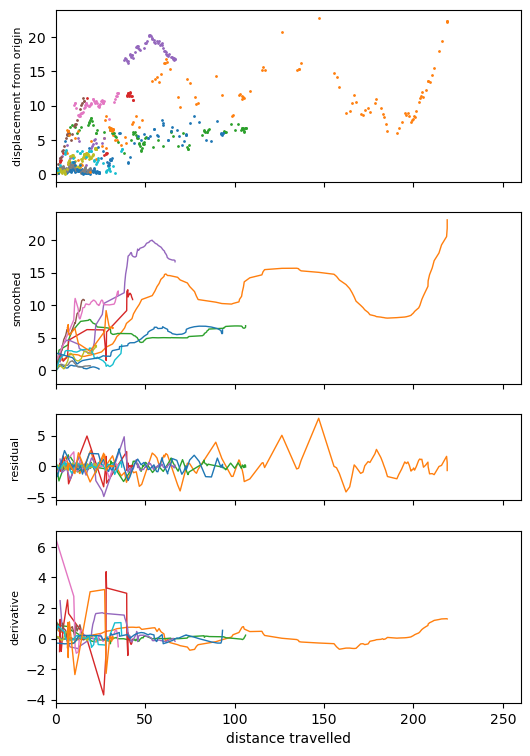

In [14]:
from tqdm import tqdm
from  scipy.signal import savgol_filter 

fig, axs = plt.subplots(4,1,figsize=(6,9),sharex=True,height_ratios=[2, 2,1,2])
#axs.set_xlim(0,100)
#axs.set_ylim(0,100)

# isolate one cell
TRACK_ID_TCELL = 37

for t_id in range(400,450):
    single_tcell_df = tracks_df_filtered_tcell.loc[tracks_df_filtered_tcell["track_id"]==t_id]

    if single_tcell_df['displacement from previous point'].max() > 12:
        continue

    single_tcell_df = single_tcell_df.sort_values(by=["frame"])

    data = single_tcell_df["displacement from origin"]
    if len(data) < 18:
        continue
    smooth = savgol_filter(data,mode="interp", window_length=int(len(data)/2)-1, polyorder=6)
    #smooth = savgol_filter(data,mode="interp", window_length=len(data)-1, polyorder=5)
    diff_tcell = np.diff(smooth)
    #diff_tcell.extend(diff_tcell[-1])

    axs[0].scatter(single_tcell_df["distance traveled"], single_tcell_df["displacement from origin"], s=1)
    #axs[0].set_xlabel("distance travelled")
    axs[0].set_ylabel("displacement from origin",fontsize=8)
    axs[0].set_xlim(0,260)

    axs[1].plot(single_tcell_df["distance traveled"], smooth, lw=1)
    #axs[1].set_xlabel("distance travelled")
    axs[1].set_ylabel("smoothed",fontsize=8)
    axs[1].set_xlim(0,260)

    axs[2].plot(single_tcell_df["distance traveled"], data-smooth, lw=1)
    #axs[1].set_xlabel("distance travelled")
    axs[2].set_ylabel("residual",fontsize=8)
    axs[2].set_xlim(0,260)

    axs[3].plot(single_tcell_df["distance traveled"][:-1], diff_tcell, lw=1)
    axs[3].set_xlabel("distance travelled")
    axs[3].set_ylabel("derivative",fontsize=8)
    axs[3].set_xlim(0,260)
    #axs[1].set_ylabel("displacement from origin")


# for t in tqdm(range(2000)):
#     single_tcell_df_ = single_tcell_df[single_tcell_df["frame"] == t]
#     single_tcell_df_.plot("distance travelled","displacement from origin",ax=axs,lw=0.2)

# axs.get_legend().remove()

### Speed Histogram

In [15]:
speed = tracks_df_filtered_tcell.groupby(["track_id"])["speed"].mean()
pd.set_option("display.max_columns", None)
speed

track_id
1        0.896413
2        0.837512
3        1.416646
4        0.413625
5        0.904646
           ...   
49863    0.973922
49865    2.124030
49867    3.179701
49868    0.316883
49869    0.400150
Name: speed, Length: 26001, dtype: float64

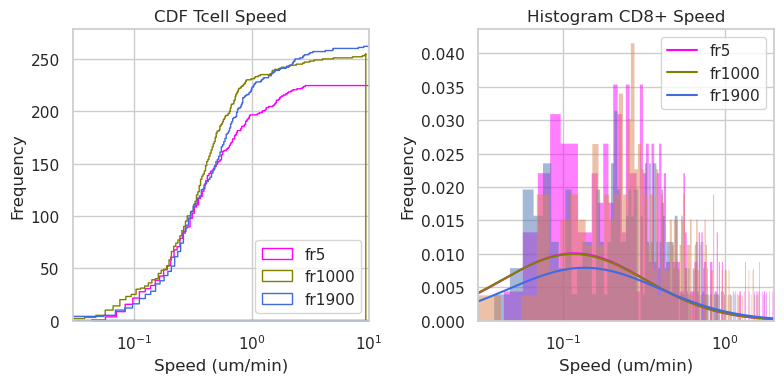

In [48]:
import seaborn as sns
from scipy import stats

tracks_df_filtered_tcell_speed_early = tracks_df_filtered_tcell[tracks_df_filtered_tcell["frame"]==5]
tracks_df_filtered_tcell_speed_mid = tracks_df_filtered_tcell[tracks_df_filtered_tcell["frame"]==1000]
tracks_df_filtered_tcell_speed_late = tracks_df_filtered_tcell[tracks_df_filtered_tcell["frame"]==1900]

# Plot tcell histogram
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.set(style='whitegrid')
sns.histplot(data=tracks_df_filtered_tcell_speed_early, x='speed', bins=1000, kde=False, edgecolor='magenta', label='fr5', stat="frequency", element="step",common_norm=False, cumulative=True,alpha=0,ax=axes[0])
sns.histplot(data=tracks_df_filtered_tcell_speed_mid, x='speed', bins=1000, kde=False, edgecolor='olive', label='fr1000',stat="frequency",element="step",common_norm=False,cumulative=True,alpha=0,ax=axes[0])
sns.histplot(data=tracks_df_filtered_tcell_speed_late, x='speed', bins=1000, kde=False, edgecolor='royalblue', label='fr1900', stat="frequency", element="step",common_norm=False,cumulative=True, alpha=0,ax=axes[0])
axes[0].set_title('CDF Tcell Speed')
axes[0].set_xlabel("Speed (um/min)")
tickpos=[1e-2,1e-1,1e0,1e1]
ticklabel = [t*1.6*10.0/60. for t in tickpos]

axes[0].set_xticks(tickpos,ticklabel)
axes[0].set_ylabel("Frequency")
axes[0].set_xscale("log")
axes[0].set_xlim([3e-2,10])
axes[0].legend(loc=4)
plt.tight_layout()
sns.histplot(data=tracks_df_filtered_tcell_speed_early, x='speed', bins=1000, kde=False, linewidth=0, color='magenta', label='', stat="probability", element="step",common_norm=False, cumulative=False,alpha=0.5,ax=axes[1])
sns.histplot(data=tracks_df_filtered_tcell_speed_mid, x='speed', bins=1000, kde=False, linewidth=0, edgecolor='olive', label='',stat="probability",element="step",common_norm=False,cumulative=False,alpha=0.5,ax=axes[1])
sns.histplot(data=tracks_df_filtered_tcell_speed_1500, x='speed', bins=1000, kde=False, linewidth=0, edgecolor='royalblue', label='', stat="probability", element="step",common_norm=False,cumulative=False, alpha=0.5,ax=axes[1])
axes[1].set_title(r'Histogram CD8+ Speed')
axes[1].set_xlabel("Speed (um/min)")

colors = {
    5: "magenta",
    1000: "olive",
    1900: "royalblue"
}

for df, fr in zip([tracks_df_filtered_tcell_speed_early, tracks_df_filtered_tcell_speed_mid, tracks_df_filtered_tcell_speed_late], colors.keys()):
    fit_y=df['speed']
    fit_y= fit_y[fit_y>3e-2]
    # sns.histplot(data=fit_y, bins=1000, kde=False, edgecolor='magenta', label=None, stat="probability", element="step",common_norm=False, cumulative=False,alpha=0,ax=axes[1])
    H,B=np.histogram(fit_y, bins=1000)
    # # H_norm=H/np.sum(H)
    # # mean, var, skew, kurt = stats.lognorm.stats(fit_y,moments="mvsk")
    # # print(
    # #     "mean: ",mean,
    # #     "var: ", var,
    # #     "skew: ", skew,
    # #     "kurt: ",kurt
    # # )
    sigma,loc,exp_mu=stats.lognorm.fit(fit_y,method='MLE')
    mu = np.log(exp_mu)
    x = np.linspace(3e-2,1e1,2000)
    # x = B
    # print(loc,exp_mu)
    pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/ (x * sigma * np.sqrt(2 * np.pi)))
    pdf = pdf/np.sum(pdf)
    axes[1].plot(x,pdf,color=colors[fr], label="fr{}".format(fr))

# # tickpos=[1e-2,1e-1,1e0,1e1]
# # ticklabel = [t*1.6*10.0/60. for t in tickpos]

# axes[1].set_xticks(tickpos,ticklabel)
axes[1].set_ylabel("Frequency")
axes[1].set_xscale("log")
# axes[1].set_yscale("log")
axes[1].set_xlim([3e-2,2])
axes[1].legend(loc=1)
plt.tight_layout()

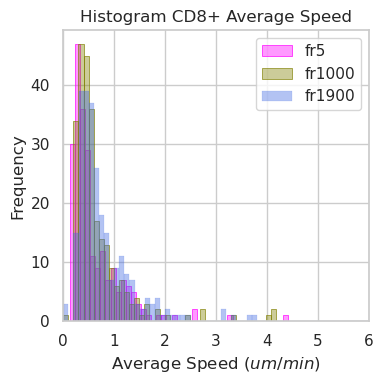

In [29]:
import seaborn as sns

# Plot tcell histogram
fig, axes = plt.subplots(1, 1, figsize=(4, 4))
sns.set(style='whitegrid')
#axes = axes.flatten()
sns.histplot(data=tracks_df_filtered_tcell_speed_early['average speed']*1.6/10*6, binwidth=0.1, kde=False, color='magenta', edgecolor='magenta', label='fr5', alpha=0.4)
sns.histplot(data=tracks_df_filtered_tcell_speed_mid['average speed']*1.6/10*6, binwidth=0.1, kde=False, color='olive', edgecolor='olive', label='fr1000',alpha=0.4)
sns.histplot(data=tracks_df_filtered_tcell_speed_late['average speed']*1.6/10*6, binwidth=0.1, kde=False, color='royalblue', edgecolor='royalblue', label='fr1900',alpha=0.4)
axes.set_title('Histogram CD8+ Average Speed')
axes.set_xlabel(r'Average Speed ($um/min$)')
axes.set_ylabel("Frequency")
# axes.set_xscale("log")
axes.set_xlim([0,6])
axes.legend()
plt.tight_layout()

### Displacement and Distance Histograms

#### T Cells

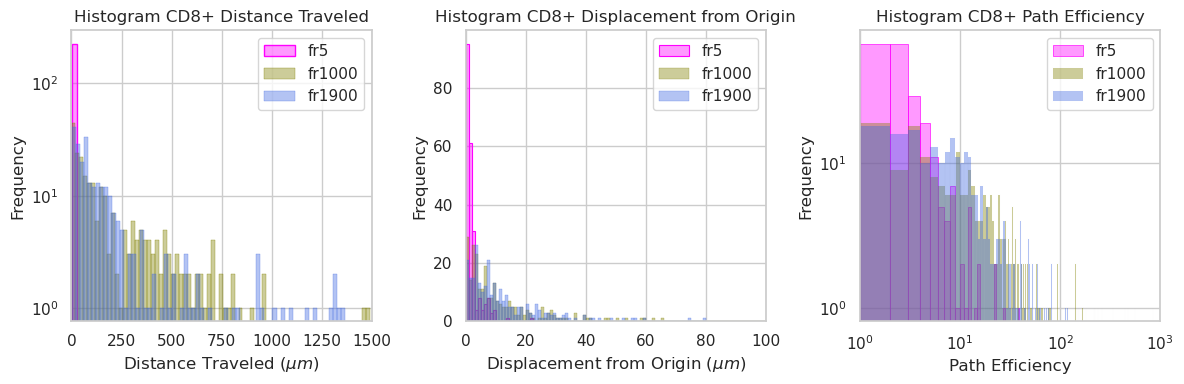

In [41]:
import seaborn as sns

# Set Seaborn style
sns.set(style='whitegrid')

tracks_df_filtered_tcell_bright_early = tracks_df_filtered_tcell[tracks_df_filtered_tcell["frame"]==5]
tracks_df_filtered_tcell_bright_mid = tracks_df_filtered_tcell[tracks_df_filtered_tcell["frame"]==1000]
tracks_df_filtered_tcell_bright_late = tracks_df_filtered_tcell[tracks_df_filtered_tcell["frame"]==1900]

# Plot tcell histogram
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes = axes.flatten()
sns.histplot(data=tracks_df_filtered_tcell_bright_early['distance traveled']*1.6, binwidth=20, kde=False, color='magenta', edgecolor='magenta',ax=axes[0], label='fr5',alpha=0.4)
sns.histplot(data=tracks_df_filtered_tcell_bright_mid['distance traveled']*1.6, binwidth=20, kde=False, color='olive', edgecolor='olive',ax=axes[0], label='fr1000',alpha=0.4)
sns.histplot(data=tracks_df_filtered_tcell_bright_late['distance traveled']*1.6, binwidth=20, kde=False, color='royalblue', edgecolor='royalblue', label='fr1900',ax=axes[0],alpha=0.4)
axes[0].set_title('Histogram CD8+ Distance Traveled')
axes[0].set_xlabel(r'Distance Traveled ($\mu m$)')
axes[0].set_ylabel("Frequency")
axes[0].set_yscale("log")
axes[0].legend()
axes[0].set_xlim([0,1500])

# Plot a histogram
sns.histplot(data=tracks_df_filtered_tcell_bright_early['displacement from origin']*1.6, binwidth=1, kde=False, color='magenta', edgecolor='magenta', ax=axes[1],label='fr5', alpha=0.4)
sns.histplot(data=tracks_df_filtered_tcell_bright_mid['displacement from origin']*1.6, binwidth=1, kde=False, color='olive', edgecolor='olive', ax=axes[1],label='fr1000', alpha=0.4)
sns.histplot(data=tracks_df_filtered_tcell_bright_late['displacement from origin']*1.6, binwidth=1, kde=False, color="royalblue", edgecolor='royalblue', ax=axes[1], label='fr1900', alpha=0.4)
axes[1].set_title('Histogram CD8+ Displacement from Origin')
axes[1].set_xlabel(r'Displacement from Origin ($\mu m$)')
axes[1].set_ylabel("Frequency")
#axes[1].set_yscale("log")
axes[1].legend()
axes[1].set_xlim([0,100])

sns.histplot(data=tracks_df_filtered_tcell_bright_early['path efficiency'], binwidth=1, kde=False, color='magenta', edgecolor='magenta', ax=axes[2],label='fr5', alpha=0.4)
sns.histplot(data=tracks_df_filtered_tcell_bright_mid['path efficiency'], binwidth=1, kde=False, color='olive', edgecolor='olive', ax=axes[2],label='fr1000', alpha=0.4)
sns.histplot(data=tracks_df_filtered_tcell_bright_late['path efficiency'], binwidth=1, kde=False, color="royalblue", edgecolor='royalblue', ax=axes[2], label='fr1900', alpha=0.4)
axes[2].set_title('Histogram CD8+ Path Efficiency')
axes[2].set_xlabel(r'Path Efficiency')
axes[2].set_xscale("log")
axes[2].set_ylabel("Frequency")
axes[2].set_yscale("log")
axes[2].legend()
axes[2].set_xlim([1,1e3])

plt.tight_layout()

#### Cancer Cells

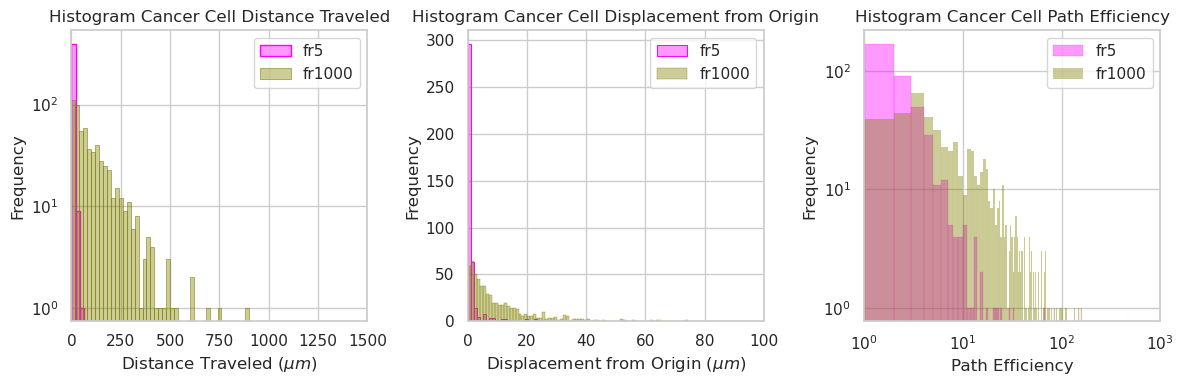

In [40]:
import seaborn as sns

# Set Seaborn style
sns.set(style='whitegrid')

tracks_df_filtered_cancer_bright_early = tracks_df_filtered_cancer[tracks_df_filtered_cancer["frame"]==5]
tracks_df_filtered_cancer_bright_mid = tracks_df_filtered_cancer[tracks_df_filtered_cancer["frame"]==1000]
# tracks_df_filtered_cancer_bright_late = tracks_df_filtered_tcell[tracks_df_filtered_cancer["frame"]==1900]

# Plot tcell histogram
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
# axes = axes.flatten()
sns.histplot(data=tracks_df_filtered_cancer_bright_early['distance traveled']*1.6, binwidth=20, kde=False, color='magenta', edgecolor='magenta',ax=axes[0], label='fr5',alpha=0.4)
sns.histplot(data=tracks_df_filtered_cancer_bright_mid['distance traveled']*1.6, binwidth=20, kde=False, color='olive', edgecolor='olive',ax=axes[0], label='fr1000',alpha=0.4)
# sns.histplot(data=tracks_df_filtered_cancer_bright_1500['distance traveled']*1.6, binwidth=20, kde=False, color='royalblue', edgecolor='royalblue', label='fr1500',ax=axes[0],alpha=0.4)
axes[0].set_title('Histogram Cancer Cell Distance Traveled')
axes[0].set_xlabel(r'Distance Traveled ($\mu m$)')
axes[0].set_ylabel("Frequency")
axes[0].set_yscale("log")
axes[0].legend()
axes[0].set_xlim([0,1500])

# Plot a histogram
sns.histplot(data=tracks_df_filtered_cancer_bright_early['displacement from origin']*1.6, binwidth=1, kde=False, color='magenta', edgecolor='magenta', ax=axes[1],label='fr5', alpha=0.4)
sns.histplot(data=tracks_df_filtered_cancer_bright_mid['displacement from origin']*1.6, binwidth=1, kde=False, color='olive', edgecolor='olive', ax=axes[1],label='fr1000', alpha=0.4)
# sns.histplot(data=tracks_df_filtered_cancer_bright_1500['displacement from origin']*1.6, binwidth=1, kde=False, color="royalblue", edgecolor='royalblue', ax=axes[1], label='fr1900', alpha=0.4)
axes[1].set_title('Histogram Cancer Cell Displacement from Origin')
axes[1].set_xlabel(r'Displacement from Origin ($\mu m$)')
axes[1].set_ylabel("Frequency")
#axes[1].set_yscale("log")
axes[1].legend()
axes[1].set_xlim([0,100])

sns.histplot(data=tracks_df_filtered_cancer_bright_early['path efficiency'], binwidth=1, kde=False, color='magenta', edgecolor='magenta', ax=axes[2],label='fr5', alpha=0.4)
sns.histplot(data=tracks_df_filtered_cancer_bright_mid['path efficiency'], binwidth=1, kde=False, color='olive', edgecolor='olive', ax=axes[2],label='fr1000', alpha=0.4)
# sns.histplot(data=tracks_df_filtered_cancer_bright_1500['path efficiency'], binwidth=1, kde=False, color="royalblue", edgecolor='royalblue', ax=axes[2], label='fr1900', alpha=0.4)
axes[2].set_title('Histogram Cancer Cell Path Efficiency')
axes[2].set_xlabel(r'Path Efficiency')
axes[2].set_xscale("log")
axes[2].set_ylabel("Frequency")
axes[2].set_yscale("log")
axes[2].legend()
axes[2].set_xlim([1,1e3])

plt.tight_layout()